In [492]:
import pandas as pd
import numpy as np
import json
import re
from plotnine import *
import plotnine


%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)



# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'


matplotlib.rc('font', family='NanumBarunGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False


# pandas max row 
pd.options.display.max_rows = 3000

## 세종시 dataset


In [264]:
# Data Laad
df = pd.read_csv('data/아파트매매_부동산지수.csv', parse_dates=['yyyymmdd']).drop(columns=['Unnamed: 0'])

# Set 면적평균가
df['면적평균가'] = df['거래금액'].astype(float) / df['전용면적']


# Rename Column
df = df.rename(columns={'yyyymmdd':'년월일'})
df = df.set_index('년월일')

# Sort by Datetime
df = df.sort_index()
# Reducing Columns
df['법정동'] = df['법정동'].str.split(' ').str[0]
df['누적평균값'] = df['거래금액'].cumsum() / df['전용면적'].cumsum()

df = df.reindex(columns=['법정동','거래금액','전용면적','누적평균값', '아파트세종', '아파트전국','전체세종','전체서울','아파트서울','전체전국'])

In [265]:
df.columns

Index(['법정동', '거래금액', '전용면적', '누적평균값', '아파트세종', '아파트전국', '전체세종', '전체서울',
       '아파트서울', '전체전국'],
      dtype='object')

In [266]:
df.head(15)

,법정동,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
년월일,,,,,,,,,,
2017-01-01,종촌동,27300,59.8652,456.024535,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-01,보람동,8600,16.9849,467.143179,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,13000,84.9228,302.275597,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,아름동,31300,84.9280,325.090018,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,어진동,7600,17.4250,332.417230,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,고운동,32000,84.9894,343.153107,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,19850,84.6682,321.934790,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,22500,128.9491,288.147514,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,19000,84.7067,279.794569,95.9,99.0,96.0,97.1,96.3,98.7


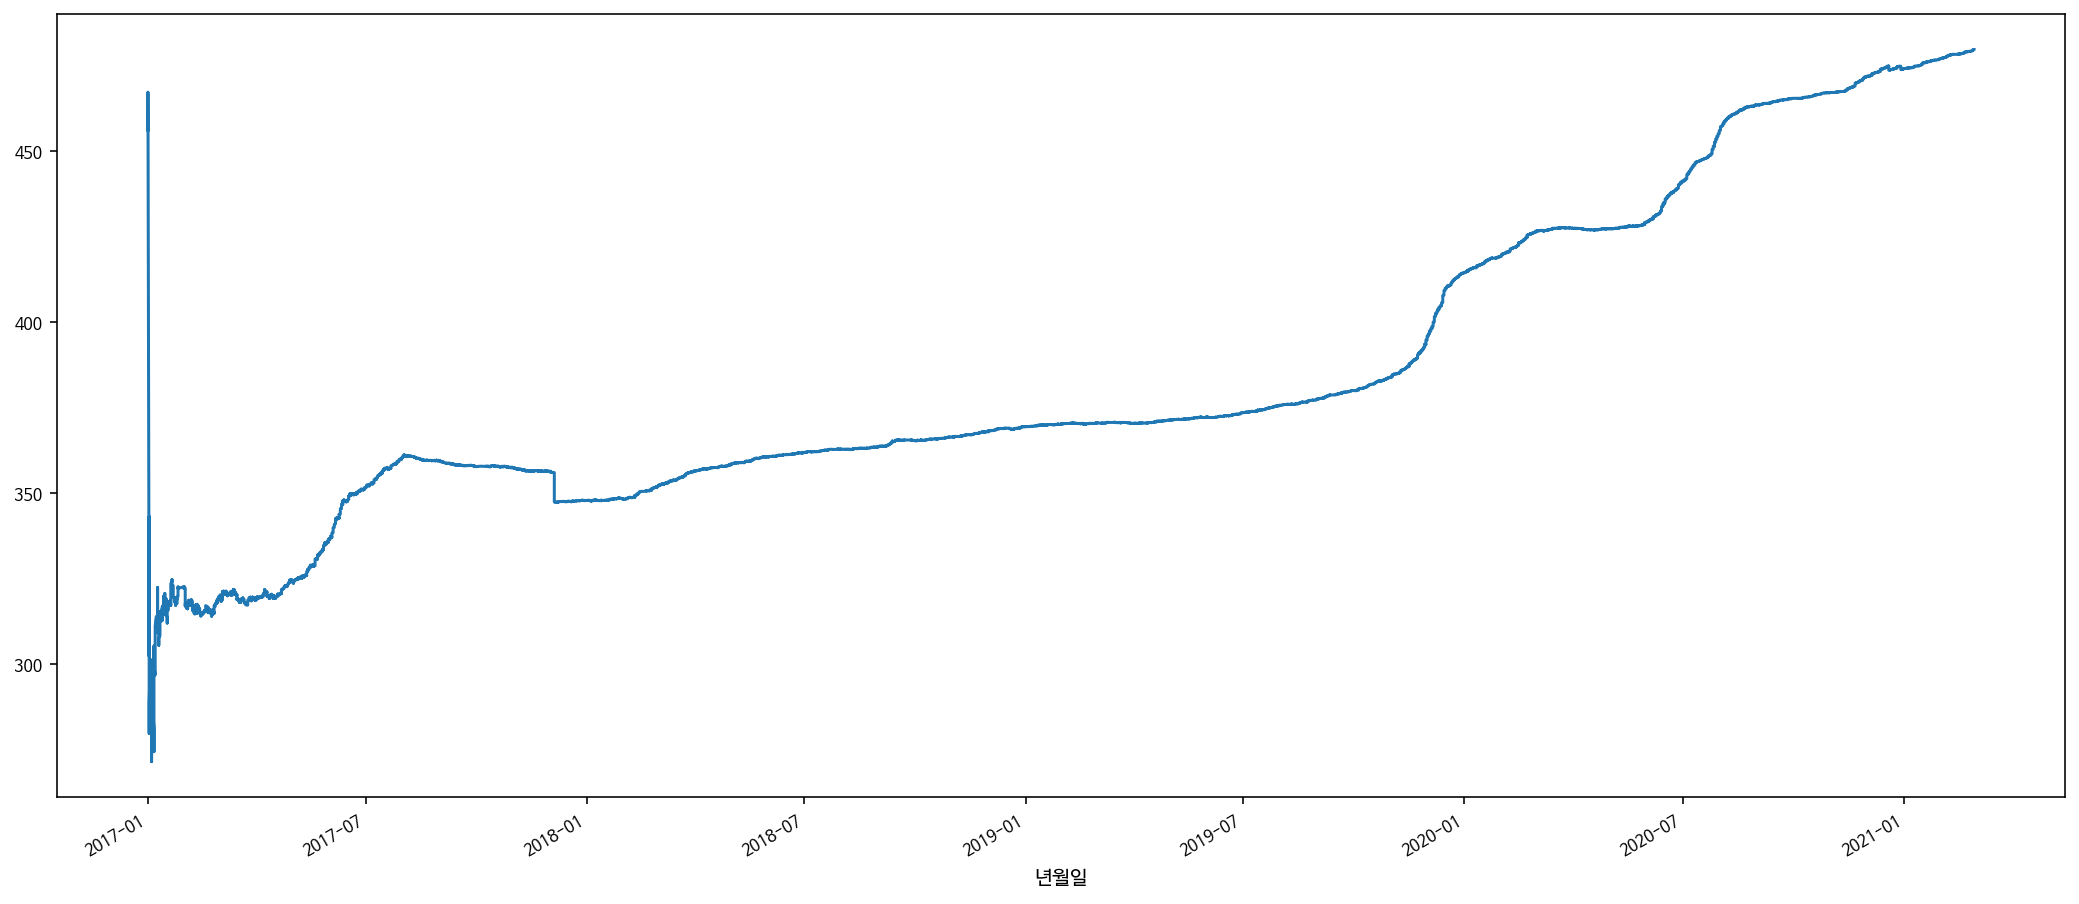

In [57]:
# y = 누적 평균값

df['누적평균값'].plot(figsize=(18,8));
# dong.head()

In [58]:
df.describe().transpose().applymap(np.ceil)

,count,mean,std,min,25%,50%,75%,max
거래금액,24417.0,36995.0,21575.0,1800.0,23000.0,34000.0,48500.0,170000.0
전용면적,24417.0,78.0,24.0,13.0,60.0,85.0,85.0,210.0
누적평균값,24417.0,400.0,46.0,272.0,361.0,398.0,435.0,480.0
아파트세종,24417.0,109.0,16.0,96.0,99.0,101.0,114.0,146.0
아파트전국,24417.0,101.0,3.0,98.0,100.0,101.0,102.0,109.0
전체세종,24417.0,109.0,14.0,96.0,101.0,102.0,114.0,142.0
전체서울,24417.0,107.0,5.0,98.0,104.0,109.0,109.0,113.0
아파트서울,24417.0,108.0,6.0,97.0,105.0,111.0,111.0,115.0
전체전국,24417.0,102.0,3.0,99.0,101.0,101.0,103.0,109.0


In [59]:
df.dtypes

법정동       object
거래금액       int64
전용면적     float64
누적평균값    float64
아파트세종    float64
아파트전국    float64
전체세종     float64
전체서울     float64
아파트서울    float64
전체전국     float64
dtype: object

In [60]:
df.head()

,법정동,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
년월일,,,,,,,,,,
2017-01-01,종촌동,27300,59.8652,456.024535,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-01,보람동,8600,16.9849,467.143179,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,13000,84.9228,302.275597,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,아름동,31300,84.9280,325.090018,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,어진동,7600,17.4250,332.417230,95.9,99.0,96.0,97.1,96.3,98.7


## 이동 평균선
### 동별로 데이터 분리

In [61]:
# reset index
df = df.reset_index()

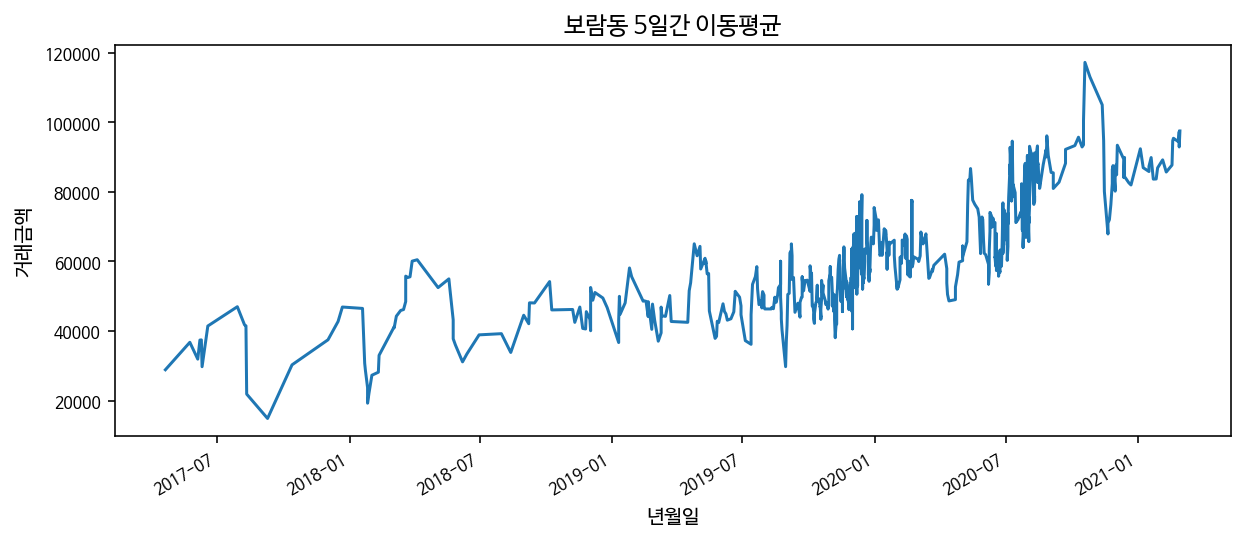

In [49]:
datemin = np.datetime64(df_보람동.index[0], 'M')
datemax = np.datetime64(df_보람동.index[-1], 'M')

df_보람동['거래금액'].rolling(5).mean().plot(ylabel='거래금액', title='보람동 5일간 이동평균', figsize=(10,4));

In [291]:
# 이동편균 기간 5로 설정
def setMovingMean(df, dong, duration=5):
    dong_df = df[df['법정동']==dong].copy()
    dong_df = dong_df[['거래금액','전용면적']].groupby('년월일').mean()
    dong_df['법정동'] = dong
    dong_df['이동평균'] = dong_df['거래금액'] / dong_df['전용면적']
    dong_df['이동평균'] = dong_df['이동평균'].rolling(duration).mean()
    return dong_df

mov_df = pd.concat(setMovingMean(df, dong, 8) for dong in df['법정동'].unique())
mov_df.head(20)




,거래금액,전용면적,법정동,이동평균
년월일,,,,
2017-01-01,27300.000000,59.865200,종촌동,NaN
2017-01-03,28900.000000,59.938300,종촌동,NaN
2017-01-05,27300.000000,59.938300,종촌동,NaN
2017-01-07,36750.000000,84.994050,종촌동,NaN
2017-01-08,36000.000000,84.942400,종촌동,NaN
2017-01-09,31766.666667,76.624933,종촌동,NaN
2017-01-12,25000.000000,59.938300,종촌동,NaN
2017-01-13,34925.000000,84.978475,종촌동,436.563841
2017-01-14,27820.000000,64.782580,종촌동,433.240328


In [113]:
df['법정동'].unique()

array(['종촌동', '보람동', '조치원읍', '아름동', '어진동', '고운동', '한솔동', '연서면', '도담동',
       '연동면', '장군면', '나성동', '부강면', '소담동', '금남면', '전의면', '전동면', '소정면',
       '새롬동', '대평동', '다정동', '반곡동', '해밀동'], dtype=object)

In [136]:
mov_df[mov_df['법정동']=='해밀동'].count()[0]

24

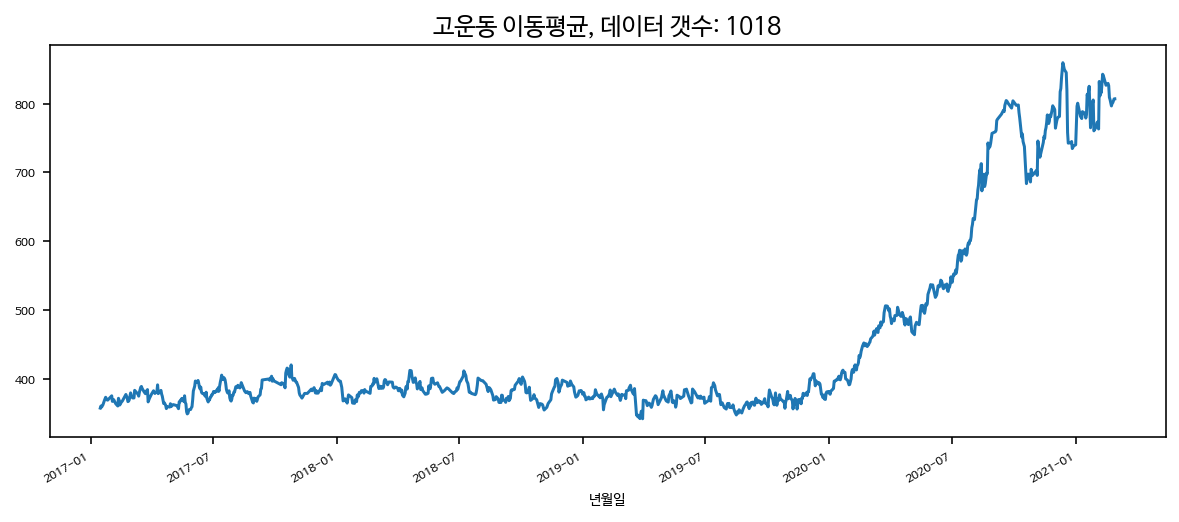

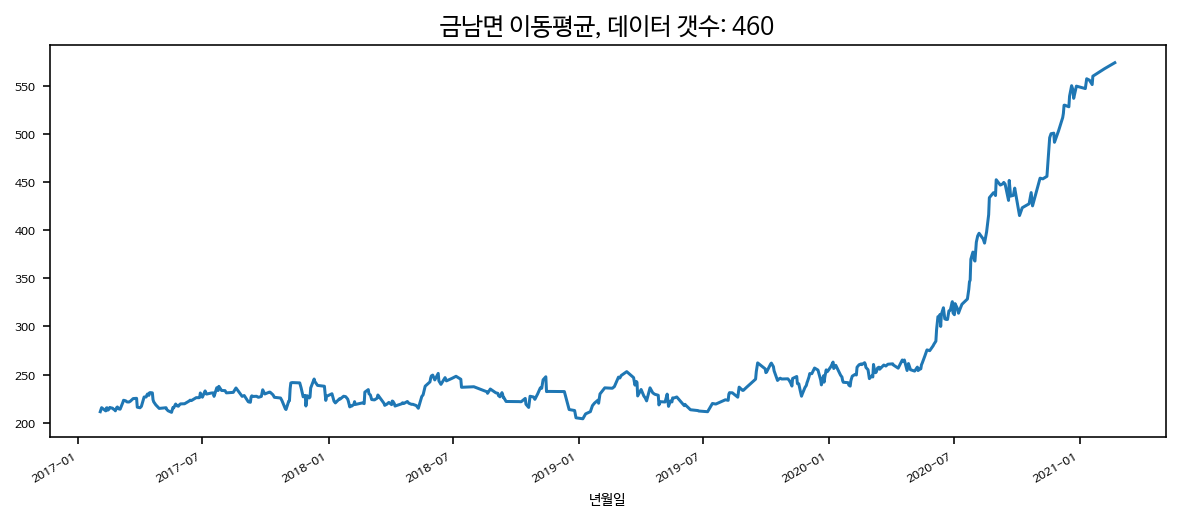

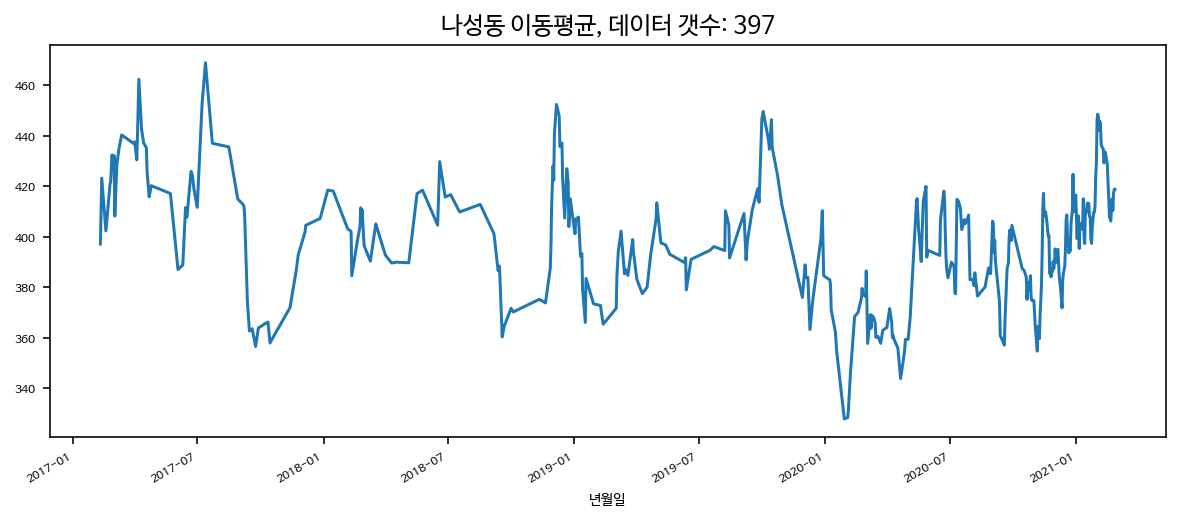

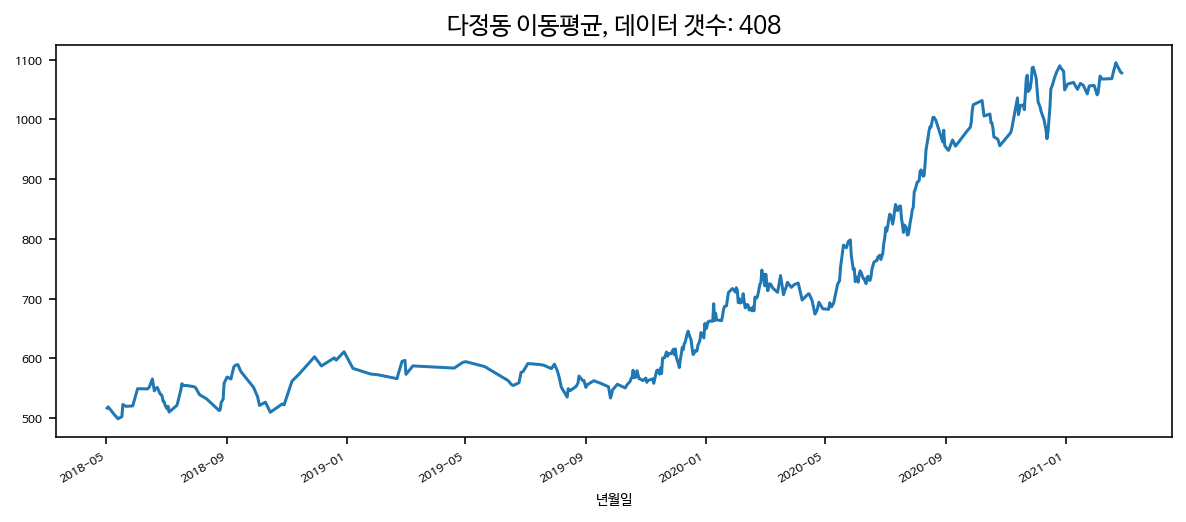

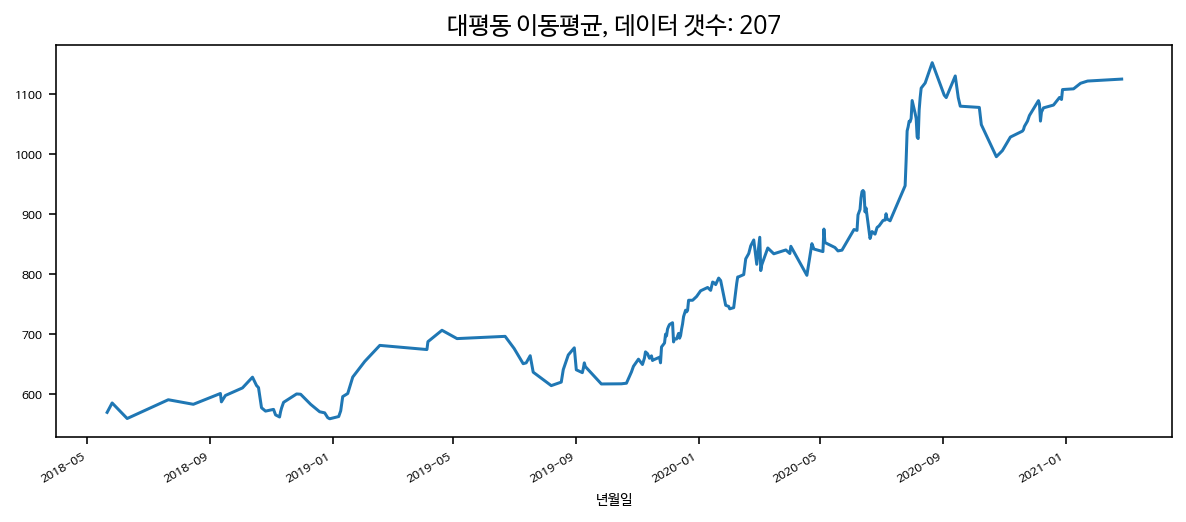

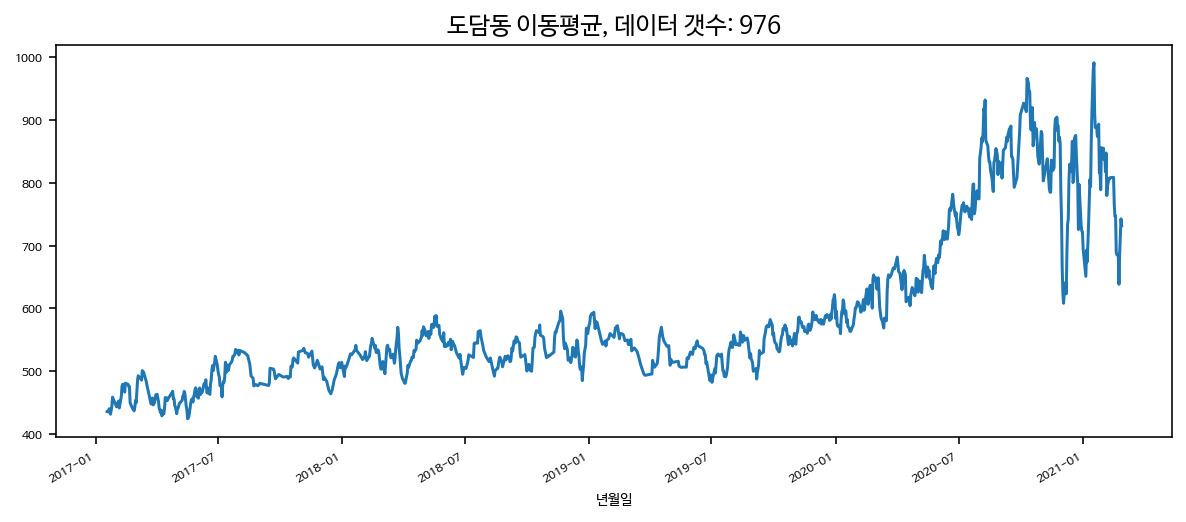

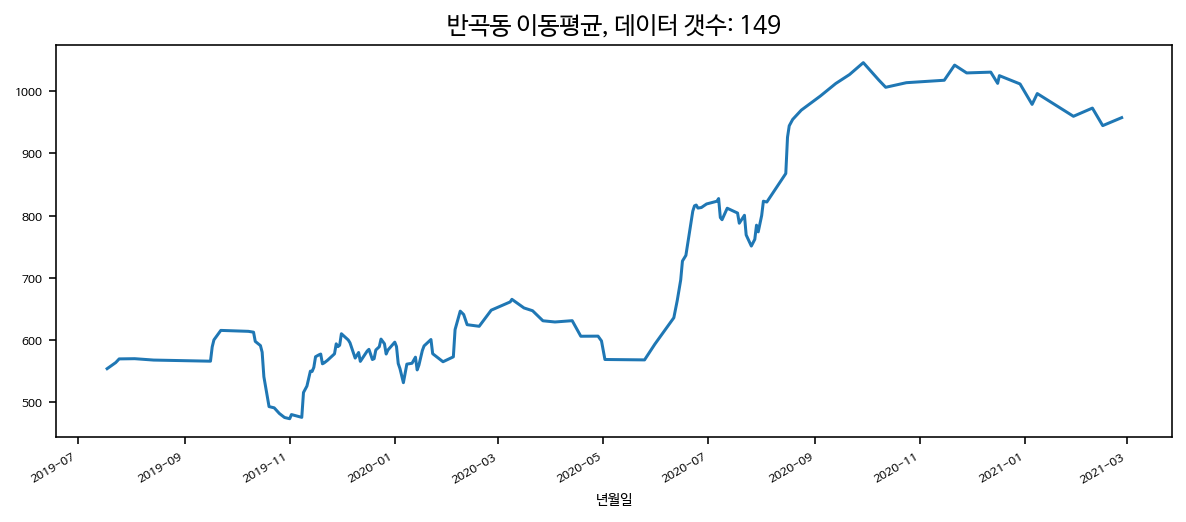

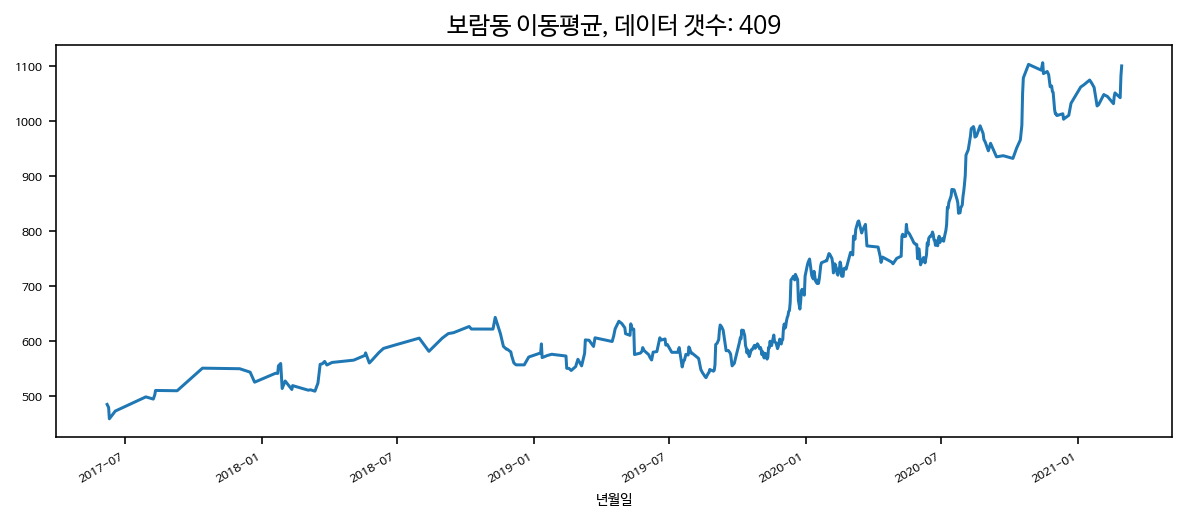

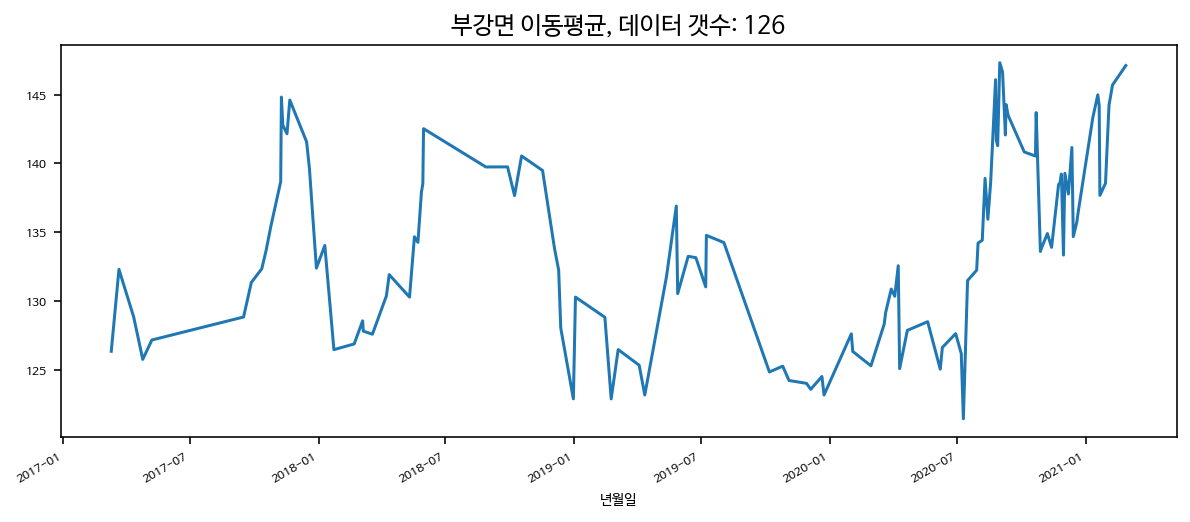

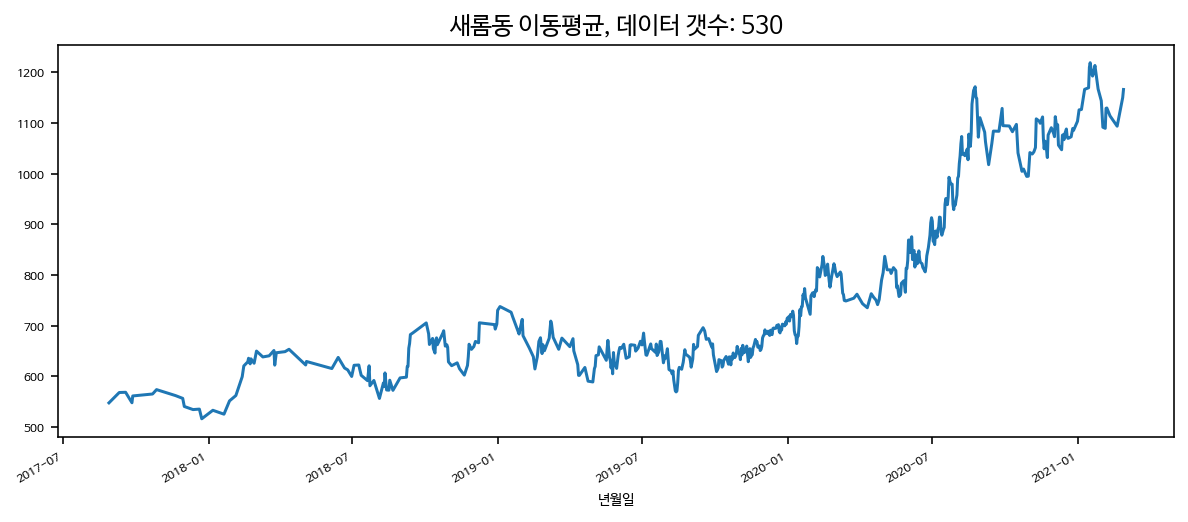

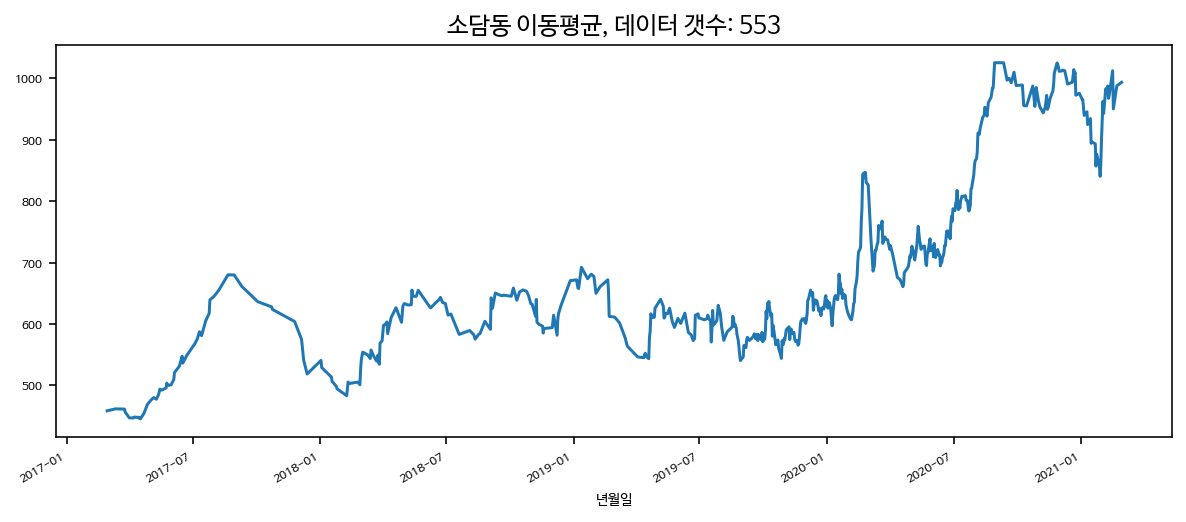

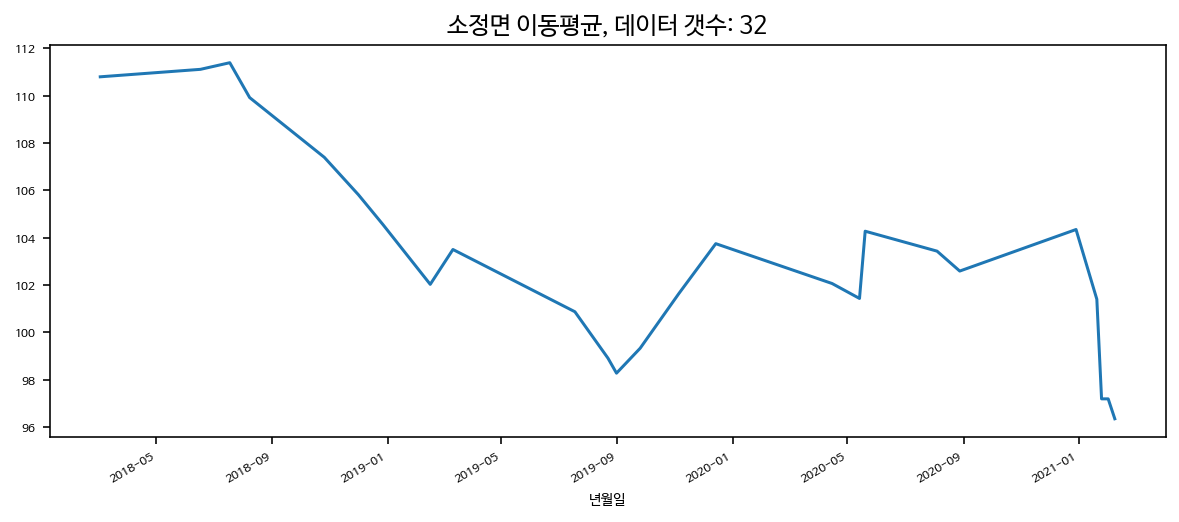

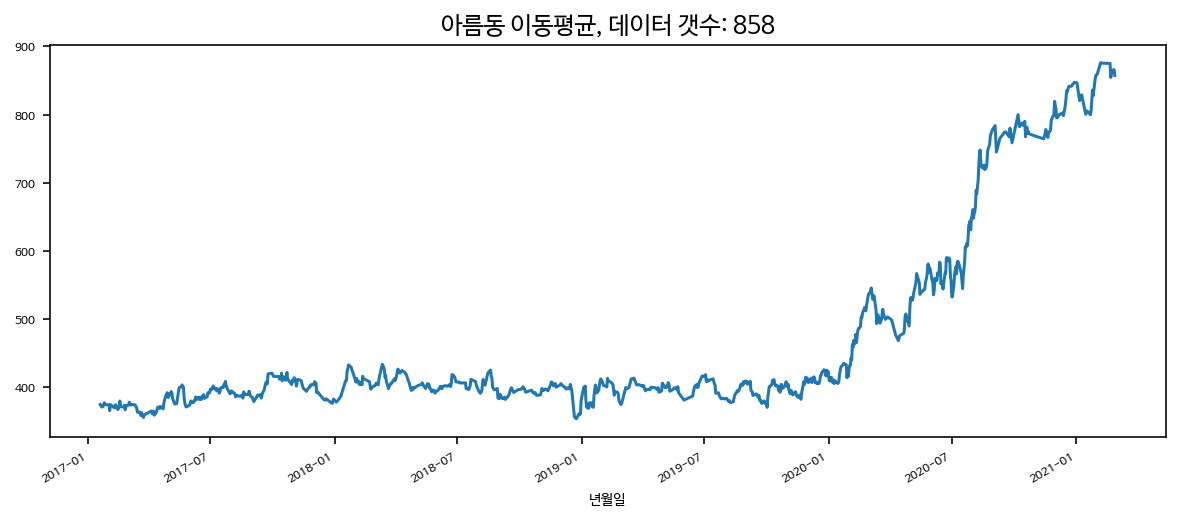

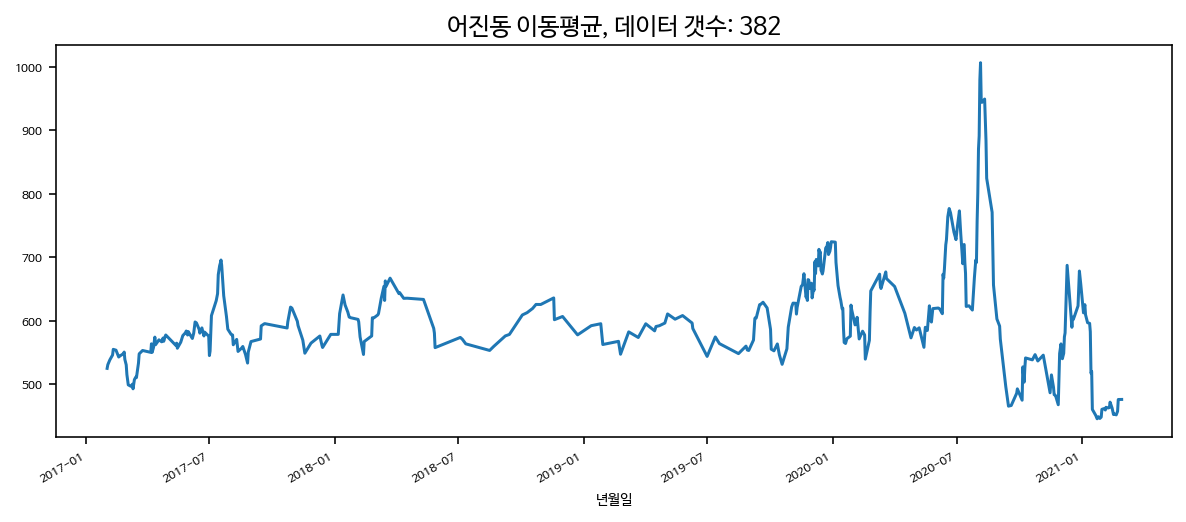

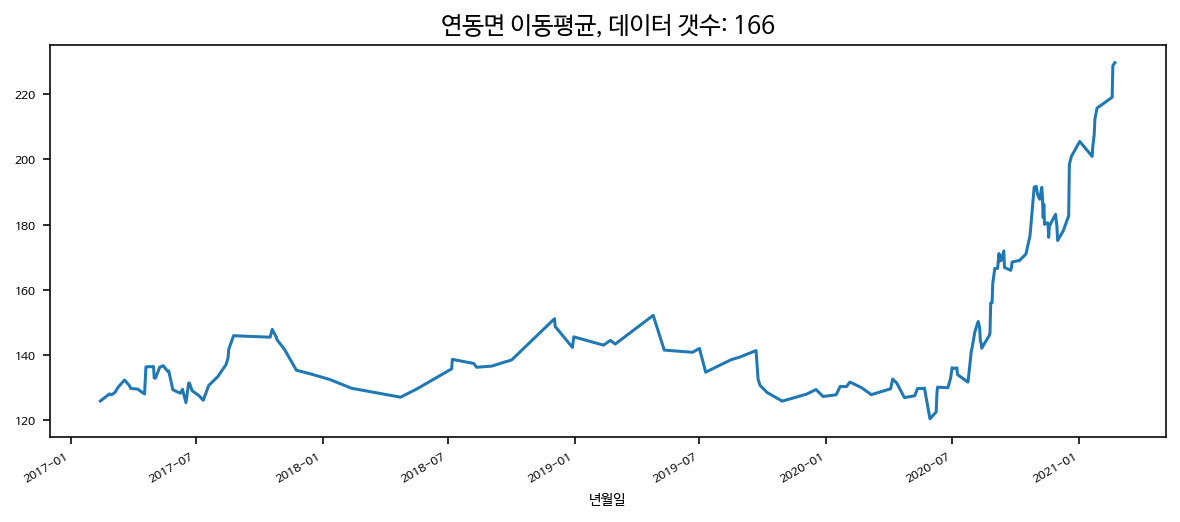

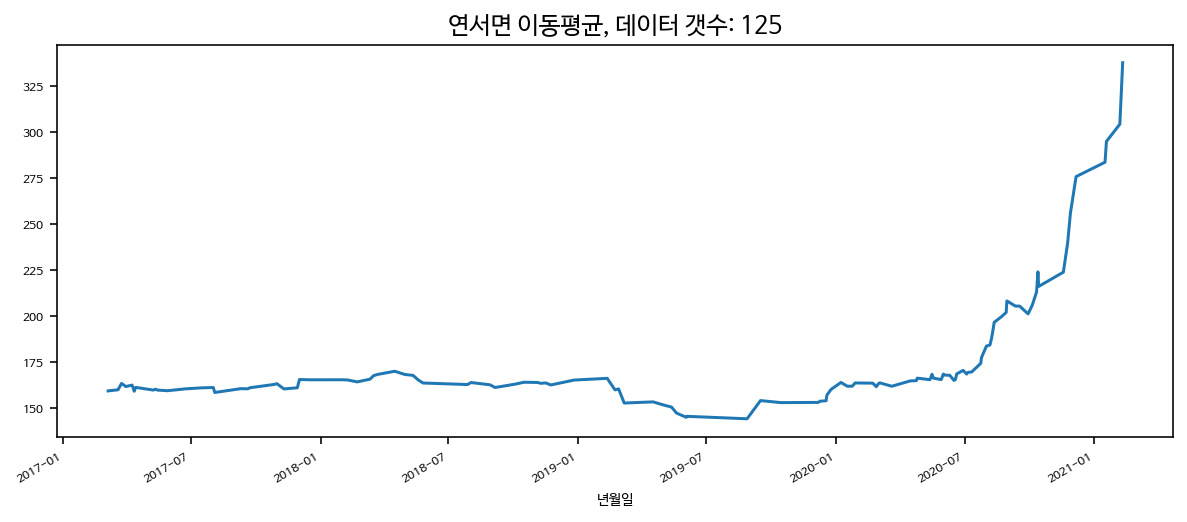

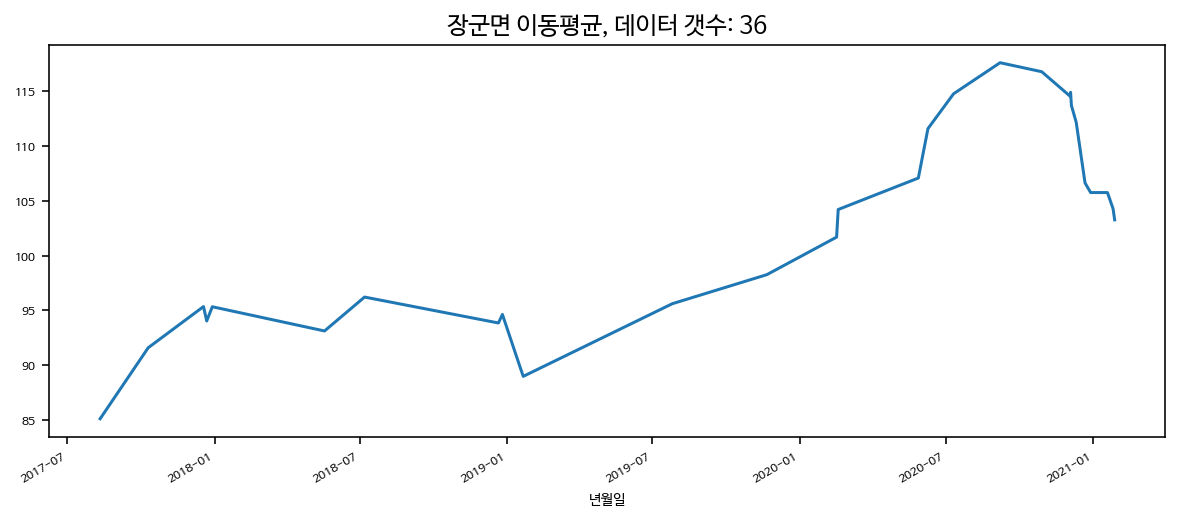

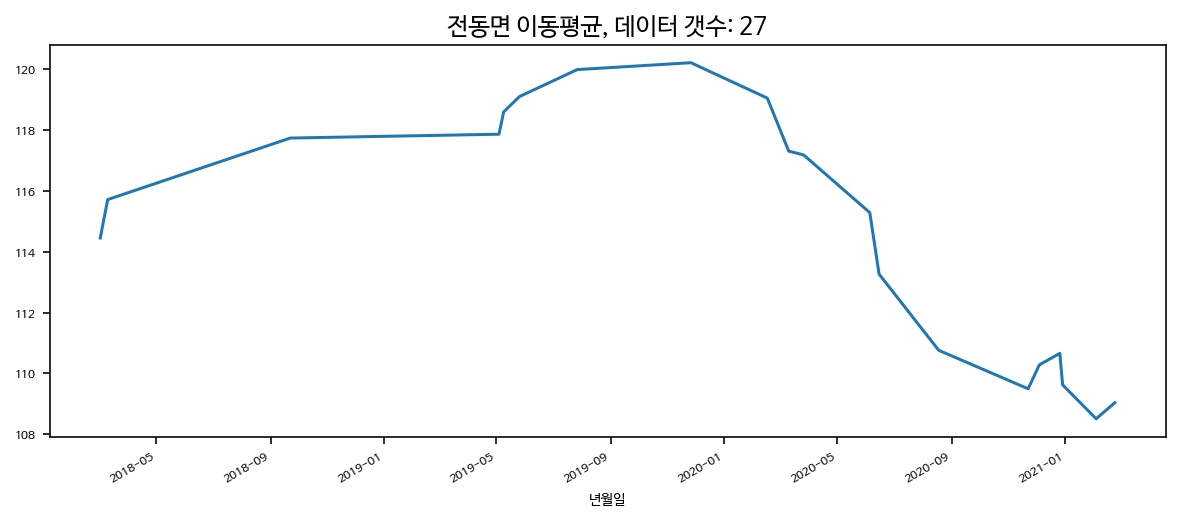

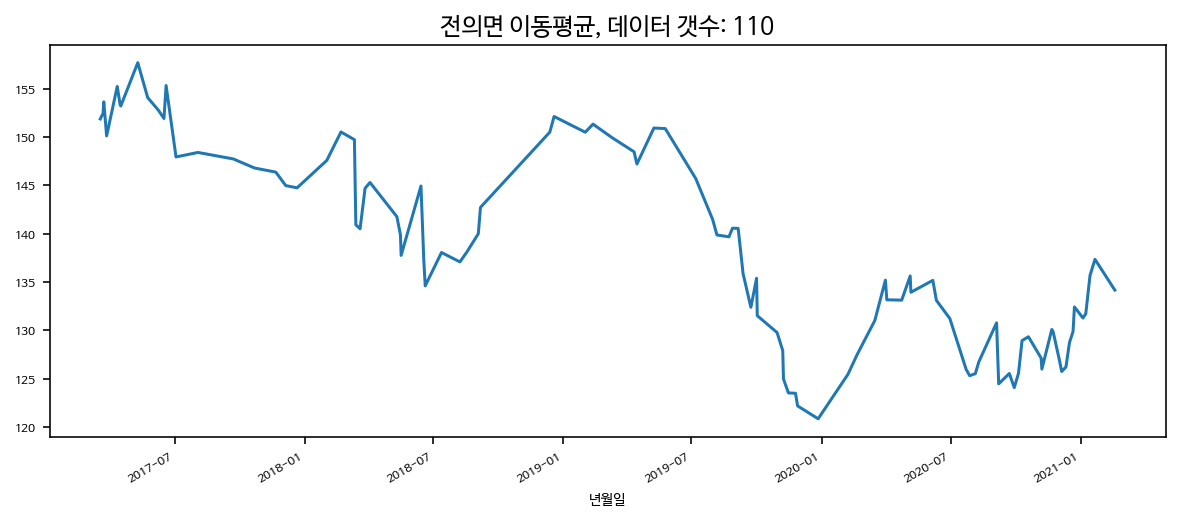

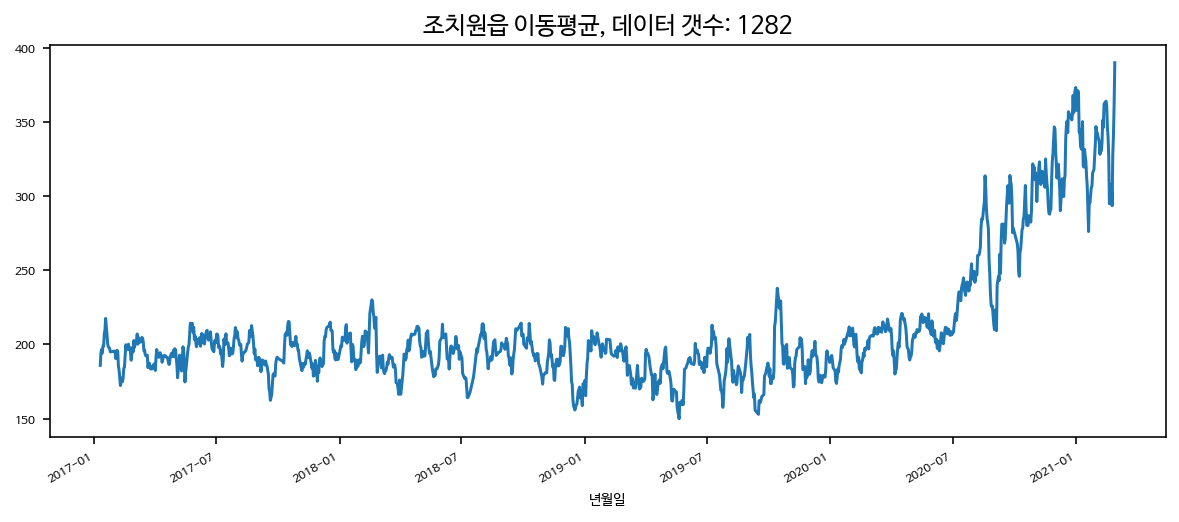

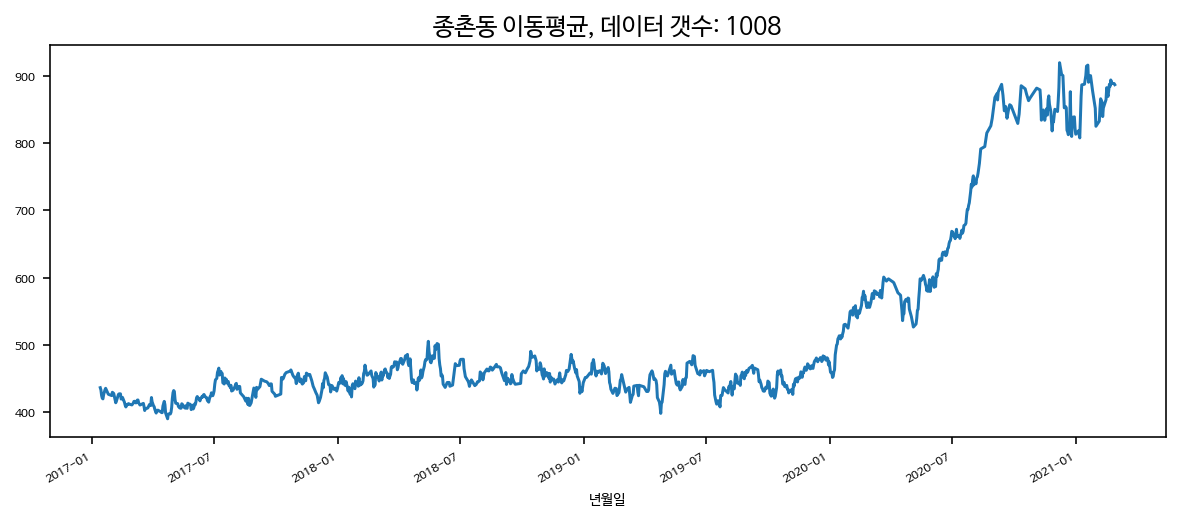

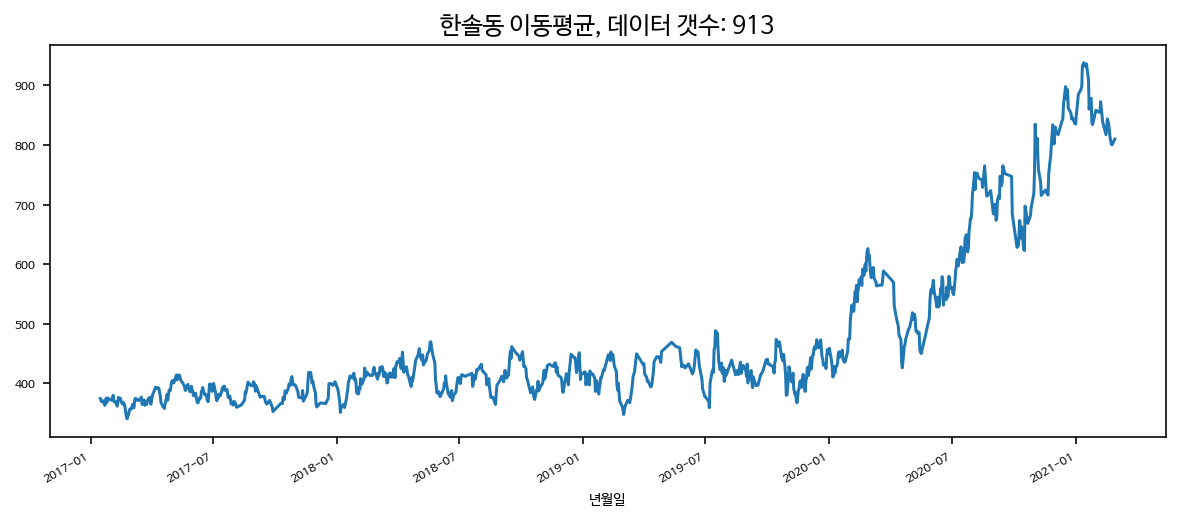

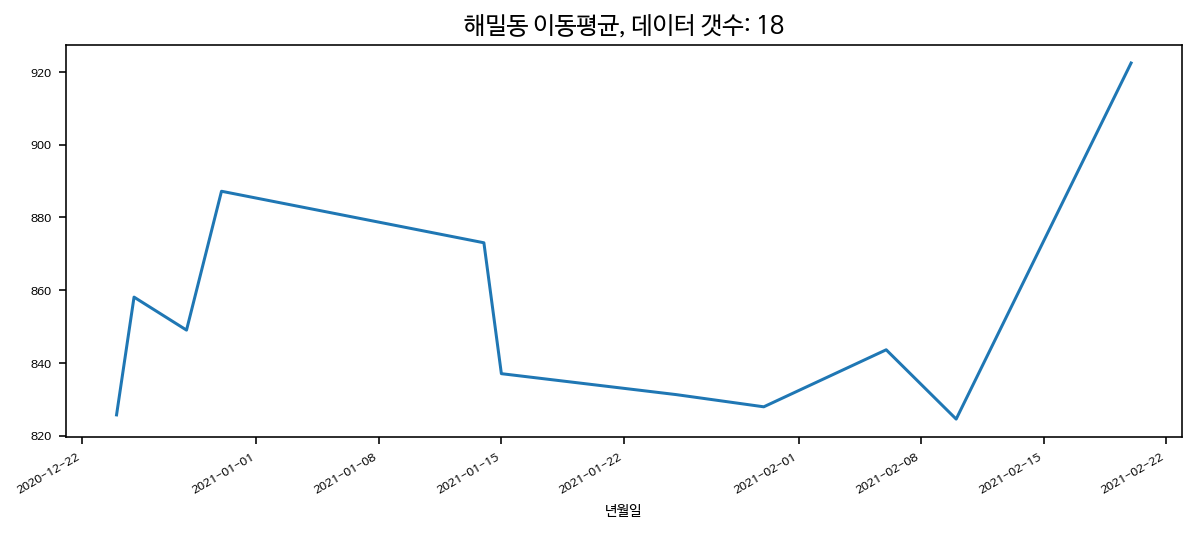

In [290]:
for dong in np.sort(df['법정동'].unique()):
    mov_df[mov_df['법정동']==dong]['이동평균'].plot(figsize=(10,4), title=dong + ' 이동평균, 데이터 갯수: ' + str(mov_df[mov_df['법정동']==dong].count()[0]) )
    # plt.savefig('figure/'+dong + '_이동평균.png', dpi=600)
    plt.show()
    


### 조치원 데이터 확인

<AxesSubplot:xlabel='년월일'>

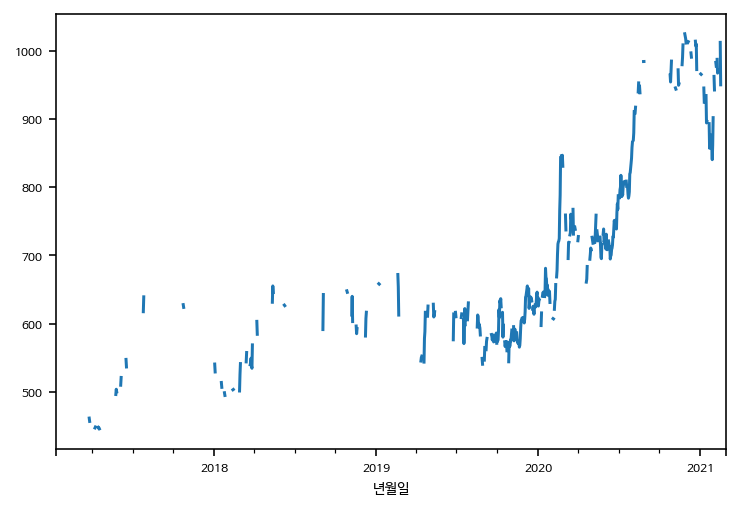

In [310]:
mov_df[mov_df['법정동']=='소담동'].asfreq('D')['이동평균'].plot()

## Missing Date

In [308]:
df_새롬동 = mov_df[mov_df['법정동']=='소담동'].groupby('년월일').count().asfreq('D')
df_새롬동.head()

,거래금액,전용면적,법정동,이동평균
년월일,,,,
2017-01-10,1.0,1.0,1.0,0.0
2017-01-11,NaN,NaN,NaN,NaN
2017-01-12,NaN,NaN,NaN,NaN
2017-01-13,NaN,NaN,NaN,NaN
2017-01-14,NaN,NaN,NaN,NaN


<AxesSubplot:>

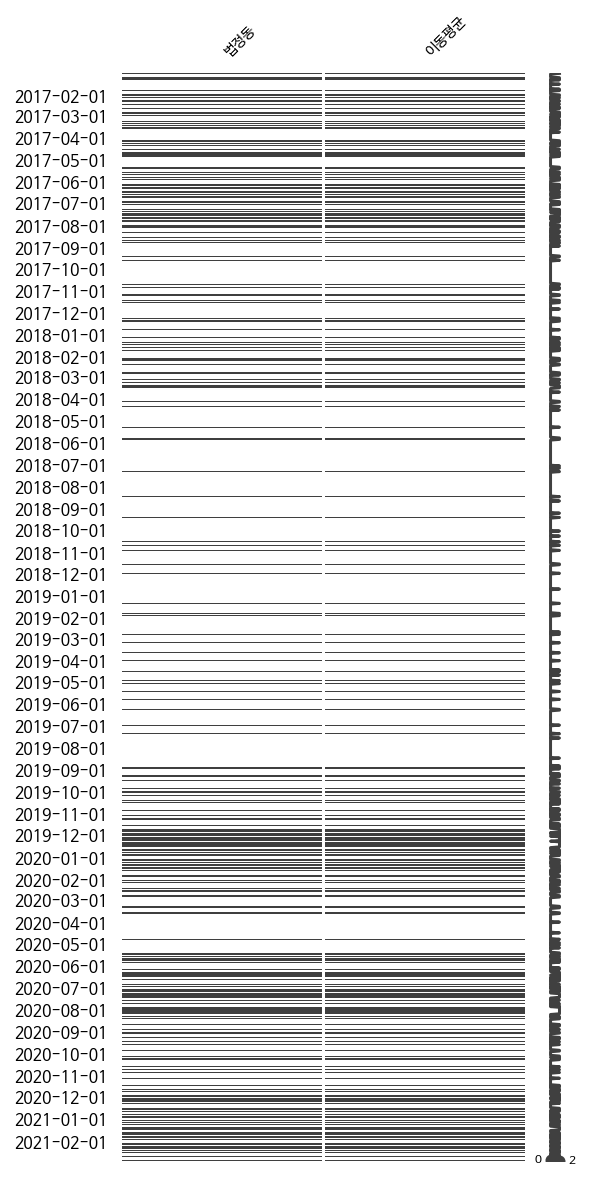

In [300]:
# 결측치 보기
import missingno as msno
msno.matrix(df_새롬동[['법정동','이동평균']],freq='MS', figsize=(4,10), fontsize=7)

In [233]:
set_새롬동 = mov_df[mov_df['법정동']=='새롬동'].groupby('년월일').mean().asfreq('D')
set_새롬동.head()

,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국,이동평균
년월일,,,,,,,,,,
2017-06-14,27200.0,59.9602,347.525079,98.7,99.4,98.5,98.5,98.2,99.2,NaN
2017-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
set_새롬동['이동평균'] = set_새롬동['거래금액'].rolling(3).mean()

In [236]:
df[df['법정동']=='조치원읍']

,년월일,법정동,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
2,2017-01-02,조치원읍,13000,84.9228,302.275597,95.9,99.0,96.0,97.1,96.3,98.7
6,2017-01-02,조치원읍,19850,84.6682,321.934790,95.9,99.0,96.0,97.1,96.3,98.7
7,2017-01-02,조치원읍,22500,128.9491,288.147514,95.9,99.0,96.0,97.1,96.3,98.7
8,2017-01-02,조치원읍,19000,84.7067,279.794569,95.9,99.0,96.0,97.1,96.3,98.7
13,2017-01-04,조치원읍,18300,84.9228,294.141720,95.9,99.0,96.0,97.1,96.3,98.7
...,...,...,...,...,...,...,...,...,...,...,...
24404,2021-02-27,조치원읍,46900,104.9044,479.452551,146.0,108.9,141.2,112.1,114.7,108.1
24407,2021-02-27,조치원읍,51000,128.9491,479.500342,146.0,108.9,141.2,112.1,114.7,108.1
24408,2021-02-27,조치원읍,42000,84.6641,479.501087,146.0,108.9,141.2,112.1,114.7,108.1
24409,2021-02-27,조치원읍,17800,47.0100,479.498569,146.0,108.9,141.2,112.1,114.7,108.1


In [240]:
df[df['법정동']=='조치원읍'].describe().T

,count,mean,std,min,25%,50%,75%,max
거래금액,4055.0,17877.364735,9055.702719,2880.000000,11700.000000,18000.000000,22800.000000,63300.000000
전용면적,4055.0,81.509593,30.316180,12.179900,59.990000,84.664100,84.990000,176.343000
누적평균값,4055.0,398.734745,50.065983,271.522744,358.064637,384.478153,439.061908,479.501087
아파트세종,4055.0,110.566313,16.012759,95.700000,99.600000,101.000000,113.900000,146.000000
아파트전국,4055.0,100.996523,2.416932,97.900000,99.400000,100.400000,101.500000,108.900000
전체세종,4055.0,110.304661,14.151330,96.000000,100.300000,102.200000,114.000000,141.200000
전체서울,4055.0,105.910900,4.569825,97.100000,103.000000,107.300000,108.900000,112.100000
아파트서울,4055.0,107.331739,5.560936,96.300000,104.400000,109.100000,110.900000,114.700000
전체전국,4055.0,101.796276,2.290142,98.700000,100.300000,101.100000,102.900000,108.100000


In [260]:
df[['법정동', '전용면적']].groupby('법정동').describe()['전용면적'][['count','mean','std']].sort_values(by=['std'],ascending=False)

,count,mean,std
법정동,,,
어진동,499.0,54.558255,33.695251
조치원읍,4055.0,81.509593,30.316180
도담동,2513.0,74.191470,23.584666
보람동,775.0,85.570231,21.482401
한솔동,2020.0,90.537599,19.586427
반곡동,206.0,76.719388,18.471782
새롬동,1294.0,80.530705,17.998490
대평동,286.0,84.102413,16.906819
소담동,1091.0,79.589773,16.439437


행정동 제거 -> 결측치 채우기 -> LSTM

- 어진동은 데이터 수가 적고, 편차도 큼
- 조치원읍은 데이터수가 많은데, 편차가 큼
- 아름동, 종촌동, 고운동, 소담동이 비교적 낮은 편차와 좋은 데이터수를 보여줌

→ 아파트란 도심 주위에 형성 되기 때문에 `면` 단위를 제거하고, 노른자 위주의 분석?

### 제거할 행정동
- 400개 이하의 데이터, 최소 2년 데이터수 = 730개(365*2) 
- 데이터 비율



In [318]:
mov_df.head(10)

,거래금액,전용면적,법정동,이동평균
년월일,,,,
2017-01-01,27300.000000,59.865200,종촌동,NaN
2017-01-03,28900.000000,59.938300,종촌동,NaN
2017-01-05,27300.000000,59.938300,종촌동,NaN
2017-01-07,36750.000000,84.994050,종촌동,NaN
2017-01-08,36000.000000,84.942400,종촌동,NaN
2017-01-09,31766.666667,76.624933,종촌동,NaN
2017-01-12,25000.000000,59.938300,종촌동,NaN
2017-01-13,34925.000000,84.978475,종촌동,436.563841
2017-01-14,27820.000000,64.782580,종촌동,433.240328


In [312]:
mov_df.tail()

,거래금액,전용면적,법정동,이동평균
년월일,,,,
2021-01-25,80000.0,84.84,해밀동,831.272078
2021-01-30,111000.0,102.68,해밀동,827.920963
2021-02-06,67600.0,59.40,해밀동,843.602029
2021-02-10,79850.0,84.74,해밀동,824.543585
2021-02-20,134000.0,102.67,해밀동,922.451949


In [468]:
""" 데이터 결측치 비율 """
def getDateRatio(dong)-> pd.Series:
    dong_df = mov_df[mov_df['법정동'] == dong].reset_index()

    date_count = dong_df['년월일'].count() # 데이터수
    date_dur = (dong_df['년월일'].max() - dong_df['년월일'].min()).days # 총 기간
    date_ratio = (date_count / date_dur).round(2)
    return date_ratio

In [361]:
# 나성동의 데이터 바율
# 나성동      397
getDateRatio('나성동')

0.26

In [362]:
cnt_df = mov_df['법정동'].value_counts().to_frame().reset_index()
cnt_df = cnt_df.rename(columns={'법정동':'데이터수'})
cnt_df = cnt_df.rename(columns={'index':'법정동'})
cnt_df['데이터비율'] = cnt_df['법정동'].apply(getDateRatio)

In [366]:
cnt_df.sort_values(by='데이터비율', ascending=False)

,법정동,데이터수,데이터비율
0,조치원읍,1282,0.85
1,고운동,1018,0.67
2,종촌동,1008,0.66
3,도담동,976,0.65
4,한솔동,913,0.60
5,아름동,858,0.57
7,새롬동,530,0.39
6,소담동,553,0.37
10,다정동,408,0.37
8,금남면,460,0.31


-> 나성동 부터 제거

In [379]:
# 제거할 행정동
drop_cols = cnt_df.sort_values(by='데이터비율', ascending=False)['법정동'][11:].tolist()
mov_df = mov_df[~mov_df['법정동'].str.contains("|".join(drop_cols))]



In [386]:
# 제거된 행정동
print(drop_cols)

['나성동', '어진동', '해밀동', '대평동', '반곡동', '연동면', '부강면', '연서면', '전의면', '장군면', '소정면', '전동면']


In [380]:
mov_df

,거래금액,전용면적,법정동,이동평균
년월일,,,,
2017-01-01,27300.0,59.86520,종촌동,NaN
2017-01-03,28900.0,59.93830,종촌동,NaN
2017-01-05,27300.0,59.93830,종촌동,NaN
2017-01-07,36750.0,84.99405,종촌동,NaN
2017-01-08,36000.0,84.94240,종촌동,NaN
...,...,...,...,...
2021-02-19,82500.0,80.80100,다정동,1082.447538
2021-02-20,67500.0,59.88170,다정동,1087.911112
2021-02-21,80500.0,72.44345,다정동,1095.146427


### Inputing Missing Value

### Inputation 거래금액 using Linear interpolation

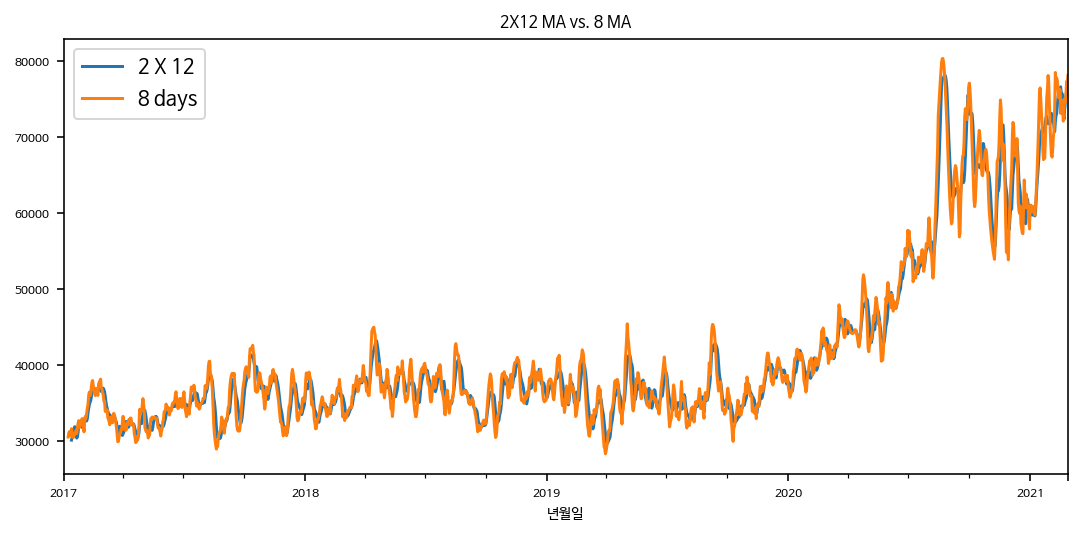

In [493]:
# Moving average comparsion 2 X 12 vs. 8 
dong_df['거래금액'].rolling(2).mean().rolling(12).mean().plot(figsize=(9,4), label='2 X 12');
dong_df['거래금액'].rolling(8).mean().plot(label='8 days', title='2X12 MA vs. 8 MA');
plt.legend();
plt.show()

Select 2 X 12 MA

In [495]:
def InputingNA(dong) -> pd.DataFrame:
    dong_df = mov_df[mov_df['법정동']==dong]
    dong_df = dong_df.asfreq('D')
    dong_df['법정동'] = dong_df['법정동'].fillna(dong)

    dong_df['거래금액'] = dong_df['거래금액'].interpolate(method='slinear')
    dong_df['이동평균'] = dong_df['거래금액'].rolling(2).mean().rolling(12).mean()
    return dong_df



In [511]:
dong_df = InputingNA('아름동')

In [512]:
dong_df.head(15)

,거래금액,전용면적,법정동,이동평균
년월일,,,,
2017-01-02,31300.0,84.9280,아름동,NaN
2017-01-03,35400.0,NaN,아름동,NaN
2017-01-04,39500.0,101.9478,아름동,NaN
2017-01-05,36000.0,NaN,아름동,NaN
2017-01-06,32500.0,92.3702,아름동,NaN
2017-01-07,33000.0,84.8854,아름동,NaN
2017-01-08,31125.0,NaN,아름동,NaN
2017-01-09,29250.0,74.5191,아름동,NaN
2017-01-10,29190.0,NaN,아름동,NaN


### Inputation 전용면적 using mode closest mean

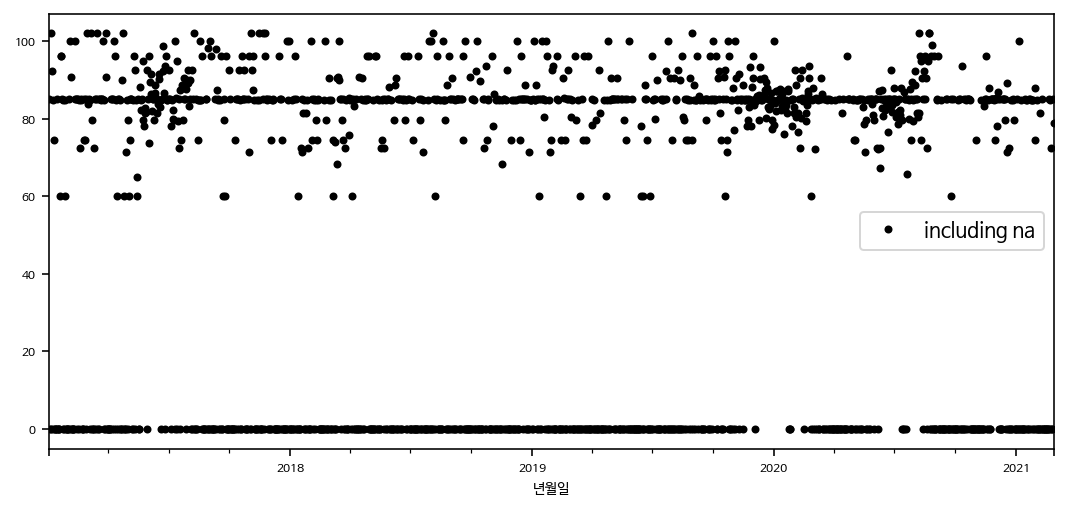

In [602]:

dong_df['전용면적'].plot(figsize=(9, 4), label='including na', legend=True, linewidth=1, style='k.');

In [594]:
dong_df['전용면적'].describe()

count    858.000000
mean      85.042423
std        7.471326
min       59.978900
25%       84.757000
50%       84.947175
75%       86.846667
max      101.947800
Name: 전용면적, dtype: float64

In [604]:
dong_df['전용면적'].mode()[0]

84.8568

평균과 가장 가까운 최빈값을 결측치로 채운다

In [608]:
dong_df['전용면적'] = dong_df['전용면적'].fillna(dong_df['전용면적'].mode()[0])

In [609]:
dong_df.head()

,거래금액,전용면적,법정동,이동평균
년월일,,,,
2017-01-02,31300.0,84.9280,아름동,NaN
2017-01-03,35400.0,84.8568,아름동,NaN
2017-01-04,39500.0,101.9478,아름동,NaN
2017-01-05,36000.0,84.8568,아름동,NaN
2017-01-06,32500.0,92.3702,아름동,NaN


In [612]:
"""Inputaion of price and area"""
def InputingNA(dong) -> pd.DataFrame:
    dong_df = mov_df[mov_df['법정동']==dong]
    dong_df = dong_df.asfreq('D')
    dong_df['법정동'] = dong_df['법정동'].fillna(dong)

    # 거래 금액 결측치
    dong_df['거래금액'] = dong_df['거래금액'].interpolate(method='slinear')
    dong_df['이동평균'] = dong_df['거래금액'].rolling(2).mean().rolling(12).mean()

    # 전용면적 결측치
    dong_df['전용면적'] = dong_df['전용면적'].fillna(dong_df['전용면적'].mode()[0])

    return dong_df

In [613]:
mov_df = pd.concat(InputingNA(dong) for dong in mov_df['법정동'].unique())

In [617]:
mov_df

,거래금액,전용면적,법정동,이동평균
년월일,,,,
2017-01-01,27300.0,59.8652,종촌동,NaN
2017-01-02,28100.0,59.9383,종촌동,NaN
2017-01-03,28900.0,59.9383,종촌동,NaN
2017-01-04,28100.0,59.9383,종촌동,NaN
2017-01-05,27300.0,59.9383,종촌동,NaN
...,...,...,...,...
2021-02-23,82300.0,59.8817,다정동,83730.000000
2021-02-24,83200.0,59.8817,다정동,83414.583333
2021-02-25,84100.0,59.8817,다정동,83155.000000
